In [1]:
%load_ext autoreload
%autoreload 2


import sys, os
sys.path.insert(0, './src/')
from IPython.display import Image, display

import numpy as np
import pandas as pd
import pickle

import load_proteins as load
import protein_algs as palgs


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from pymol import cmd


Tasks
- put more code into python library
    - maybe one centralized python source file that then loads multiple other files
    - load protein dictionary object
    - analyze topology - maybe return full skeletons
    - analyze skeletons - return pathways and hinges
    - display routines
- create environment configuration file
- add grant numbers and acknowledments to paper - see emails scattered around

New structure:
- protein_tda - all analysis algs
    - load_protein(protein_id or row number, database_file)
        - loads and preprocesses protein structures
        - returns protein structure dictionary that contains ref, def, and merged structures, along with other relevant info
    - calc_deform(protein dictionary)
        - computes protein deformation and return array compatible with merged structure, adds this ne info to dictionary
    - find_pathways(protein dictionary)
        - return pathway info, determine type of pathway automatically
    - find_hinges(protein dictionary)
        - find all relevant hinges
        - should return all hinges up to maximum number of sectors, or have option for selecting certain number so that doesn't need to repeat analysis
    
    - separate functions for different types of pathways and for computing specific number of hinge domains
        
    

In [2]:
!curl -L -o data/proteins.xlsx https://docs.google.com/spreadsheets/d/1TDsRagBXR_v9_61h5QRU0Rp3E_8eqKb9/export?format=xlsx


df_db = pd.read_excel('data/proteins.xlsx', sheet_name='allosteric')

df_db.fillna("", inplace=True)

df_db

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   375    0   375    0     0    912      0 --:--:-- --:--:-- --:--:--   914
100 28972    0 28972    0     0  41270      0 --:--:-- --:--:-- --:--:-- 41270


,protein_id,prot_name,UniProt_id,source,subunit_structure,n_sectors,mechanism,description,inactive_PDB,inactive_chains,active_PDB,active_chains,regulatory_ids,substrate_ids,notes,skip
0,ARF6,ADP-ribosylation factor 6,P62330,Daily - 10.1002/prot.21300,monomer,2,activated,GTPase: Activated when bound to GTP.,1E0S,A:1,2J5X,A:1,2J5X:A:1:GSP:190,,,
1,CDC42,Cell division control protein 42 homolog,P60953,Daily - 10.1002/prot.21300,monomer,2,activated,GTPase: Activated when bound to GTP.,1AN0,A:1,1NF3,A:1,1NF3:A:1:GNP:200,1NF3:C:1,,
2,tuf,Elongation factor Tu (Ef-Tu),Q01698,"Daily,10.1002/prot.21300",monomer,2,activated,GTPase: Activated when bound to GTP.,1TUI,A:1,1EFT,A:1,1EFT:A:1:GNP:406,,Possible allo site 1EFT:A:1:HIS:119: Kjeldgaar...,
3,RAB11A,Ras-related protein Rab-11A (Rab-11),P62491,Daily - 10.1002/prot.21300,monomer,2,activated,GTPase: Activated when bound to GTP.,1OIV,A:1,1OIW,A:1,1OIW:A:1:GSP:1174,,,
4,Rab7a,Ras-related protein Rab-7a,P09527,Daily - 10.1002/prot.21300,monomer,2,activated,GTPase: Activated when bound to GTP.,1VG1,A:1,1VG8,A:1,1VG8:A:1:GNP:400,,Pdb file 1VG8 residues are not labelled correc...,
5,RAC1,Ras-related C3 botulinum toxin substrate 1,P63000,Daily - 10.1002/prot.21300,monomer,2,activated,GTPase: Activated when bound to GTP.,1HH4,A:1,1MH1,A:1,1MH1:A:1:GNP:200,,,
6,RAP2A,Ras-related protein Rap-2a,P10114,Daily - 10.1002/prot.21300,monomer,2,activated,GTPase: Activated when bound to GTP.,1KAO,A:1,2RAP,A:1,2RAP:A:1:GTP:180,,,
7,HRAS,GTPase HRas,P01112,Daily - 10.1002/prot.21300,monomer,2,activated,GTPase: Activated when bound to GTP.,4Q21,A:1,6Q21,A:1,6Q21:A:1:GCP:180,,,
8,RHEB,GTP-binding protein Rheb,Q15382,Daily - 10.1002/prot.21300,monomer,2,activated,GTPase: Activated when bound to GTP.,1XTQ,A:1,1XTS,A:1,1XTS:A:1:GTP:179,,,
9,RHOA,Transforming protein RhoA,P61586,Daily - 10.1002/prot.21300,monomer,2,activated,GTPase: Activated when bound to GTP.,1FTN,A:1,1A2B,A:1,1A2B:A:1:GSP:538,,,


In [3]:
selection = [4, 19, 20, 46, 54]

In [6]:
exclude_bond_types=[('proximal', '')]




for index, row in df_db.iterrows():
    
    if row['skip'] == 'yes':
        continue

    if index not in selection:
        continue

    
    prot_id = row['protein_id']
    
    print(index, prot_id)
    
    display(row)

    
    iPDB_id = row['inactive_PDB']
    ichain_list = row['inactive_chains']
    load.preprocess(prot_id, iPDB_id, check=True)
    
    aPDB_id = row['active_PDB']
    achain_list = row['active_chains']
    load.preprocess(prot_id, aPDB_id, check=True)
        
    reg_list = row['regulatory_ids']
    sub_list = row['substrate_ids']
    
    print(reg_list, sub_list)
    
    idf_prot, idf_bonds = load.load_protein(prot_id, iPDB_id, ichain_list, reg_list, sub_list, exclude_bond_types=exclude_bond_types)
    adf_prot, adf_bonds = load.load_protein(prot_id, aPDB_id, achain_list, reg_list, sub_list, exclude_bond_types=exclude_bond_types)

    display(idf_prot)
    display(adf_prot)
    

    # if activated then choose active configuration as reference
    # this makes the topological features prettier
    if row['mechanism'] == 'activated':
        df_prot_ref = adf_prot
        df_bonds_ref = adf_bonds
        df_prot_def = idf_prot
        df_bonds_def = idf_bonds
    else:
        df_prot_ref = idf_prot
        df_bonds_ref = idf_bonds
        df_prot_def = adf_prot
        df_bonds_def = adf_bonds
        
    
    # Merge protein structures
    df_prot_merged = palgs.merge_structures(df_prot_ref, df_prot_def)
    df_bonds_ref_merged = palgs.merge_bonds(df_prot_ref, df_bonds_ref)
    
    # Check for extra connected components and trim
    df_prot_merged, df_bonds_ref_merged, df_prot_ref, df_prot_def = palgs.trim_disconnected(df_prot_merged, df_bonds_ref_merged, df_prot_ref, df_prot_def)
    
    print("Merged Protein Structure:")
    display(df_prot_merged)
    
    print("Merged Reference Bonds:")
    display(df_bonds_ref_merged)
    
    palgs.df_to_pdb(prot_id, df_prot_ref, label='full_reference')
    palgs.df_to_pdb(prot_id, df_prot_def, label='full_deformed')
    
    palgs.df_to_pdb(prot_id, df_prot_merged, suffix='_ref', label='merged_reference')
    palgs.df_to_pdb(prot_id, df_prot_merged, suffix='_def', label='merged_deformed')
    
     
    with open("data/" + prot_id + "/structure.pkl", 'wb') as pkl_file:
        data = {'reference structure': df_prot_ref, 'reference bonds': df_bonds_ref,
               'deformed structure': df_prot_def, 'deformed bonds': df_bonds_def,
               'merged structure': df_prot_merged, 'merged reference bonds': df_bonds_ref_merged}
        pickle.dump(data, pkl_file)
        
    
    

4 Rab7a


protein_id                                                       Rab7a
prot_name                                   Ras-related protein Rab-7a
UniProt_id                                                      P09527
source                                      Daily - 10.1002/prot.21300
subunit_structure                                              monomer
n_sectors                                                            2
mechanism                                                    activated
description                       GTPase: Activated when bound to GTP.
inactive_PDB                                                      1VG1
inactive_chains                                                    A:1
active_PDB                                                        1VG8
active_chains                                                      A:1
regulatory_ids                                        1VG8:A:1:GNP:400
substrate_ids                                                         
notes 

Preprocessing completed previously
Preprocessing completed previously
1VG8:A:1:GNP:400 
Loading protein: Rab7a 1VG1
Loading atomic structure...
['A', '1']
Loading bonds...
{'A': ('A', 1)}
Loading regulatory molecules...
Loading substrate molecules...
Identifying allosteric and active sites...
Allosteric Sites:
1VG8:A:1:GNP:400


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is data/Rab7a/1vg1_full_clean.pdb)



Series([], dtype: int64)

Active Sites:



Series([], dtype: int64)

Loading protein: Rab7a 1VG8
Loading atomic structure...
['A', '1']
Loading bonds...
{'A': ('A', 1)}
Loading regulatory molecules...
Loading substrate molecules...
Identifying allosteric and active sites...
Allosteric Sites:
1VG8:A:1:GNP:400


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is data/Rab7a/1vg8_full_clean.pdb)



Series([], dtype: int64)

Active Sites:



Series([], dtype: int64)

chain_id  chain_copy PDB_id res_name element  \
chain_index res_id atom_name                                                
0           5      N                A           1   1vg1      LYS       N   
                   CA               A           1   1vg1      LYS       C   
                   C                A           1   1vg1      LYS       C   
                   O                A           1   1vg1      LYS       O   
                   CB               A           1   1vg1      LYS       C   
...                               ...         ...    ...      ...     ...   
            185    CG               A           1   1vg1      GLU       C   
                   CD               A           1   1vg1      GLU       C   
                   OE1              A           1   1vg1      GLU       O   
                   OE2              A           1   1vg1      GLU       O   
                   OXT              A           1   1vg1      GLU       O   

                                  x          y          z  bfactor  vdw_rad  \
chain_index res_id atom_name                                                  
0           5      N         -1.040  43.981998  30.246000    33.01     1.55   
                   CA        -0.602  43.980000  28.812000    32.69     1.70   
                   C          0.693  43.178001  28.691999    31.00     1.70   
                   O          1.614  43.366001  29.506001    30.01     1.52   
                   CB        -0.365  45.415001  28.333000    33.25     1.70   
...                             ...        ...        ...      ...      ...   
            185    CG         4.297  55.571999  16.528000    33.87     1.70   
                   CD         5.778  55.498001  16.162001    43.61     1.70   
                   OE1        6.215  54.409000  15.711000    48.79     1.52   
                   OE2        6.512  56.504002  16.325001    41.11     1.52   
                   OXT        0.822  53.849998  13.954000    46.29     1.52   

                              active_site  allo_site  reg_mol  sub_mol  
chain_index res_id atom_name                                            
0           5      N                   -1         -1       -1       -1  
                   CA                  -1         -1       -1       -1  
                   C                   -1         -1       -1       -1  
                   O                   -1         -1       -1       -1  
                   CB                  -1         -1       -1       -1  
...                                   ...        ...      ...      ...  
            185    CG                  -1         -1       -1       -1  
                   CD                  -1         -1       -1       -1  
                   OE1                 -1         -1       -1       -1  
                   OE2                 -1         -1       -1       -1  
                   OXT                 -1         -1       -1       -1  

[1333 rows x 14 columns]

chain_id  chain_copy PDB_id res_name element  \
chain_index res_id atom_name                                                
0           7      N                A           1   1vg8      VAL       N   
                   CA               A           1   1vg8      VAL       C   
                   C                A           1   1vg8      VAL       C   
                   O                A           1   1vg8      VAL       O   
                   CB               A           1   1vg8      VAL       C   
...                               ...         ...    ...      ...     ...   
            190    O                A           1   1vg8      ILE       O   
                   CB               A           1   1vg8      ILE       C   
                   CG1              A           1   1vg8      ILE       C   
                   CG2              A           1   1vg8      ILE       C   
                   CD1              A           1   1vg8      ILE       C   

                                      x      y          z  bfactor  vdw_rad  \
chain_index res_id atom_name                                                  
0           7      N         -20.167999 -3.015  42.388000    42.76     1.55   
                   CA        -18.784000 -3.019  42.956001    41.56     1.70   
                   C         -17.722000 -2.684  41.888000    39.86     1.70   
                   O         -17.518000 -3.419  40.922001    39.54     1.52   
                   CB        -18.455999 -4.404  43.618000    42.49     1.70   
...                                 ...    ...        ...      ...      ...   
            190    O          -8.469000 -1.329  71.665001    48.04     1.52   
                   CB         -8.051000  0.827  69.541000    45.88     1.70   
                   CG1        -8.455000  1.653  68.306999    45.30     1.70   
                   CG2        -6.551000  0.939  69.773003    46.60     1.70   
                   CD1        -8.230000  3.117  68.519997    44.71     1.70   

                              active_site  allo_site  reg_mol  sub_mol  
chain_index res_id atom_name                                            
0           7      N                   -1         -1       -1       -1  
                   CA                  -1         -1       -1       -1  
                   C                   -1         -1       -1       -1  
                   O                   -1         -1       -1       -1  
                   CB                  -1         -1       -1       -1  
...                                   ...        ...      ...      ...  
            190    O                   -1         -1       -1       -1  
                   CB                  -1         -1       -1       -1  
                   CG1                 -1         -1       -1       -1  
                   CG2                 -1         -1       -1       -1  
                   CD1                 -1         -1       -1       -1  

[1476 rows x 14 columns]

Sector size count: {1314: 1}
Trimming 0 atoms...
Merged Protein Structure:


res_name element      x_ref    y_ref      z_ref  \
chain_index res_id atom_name                                                   
0           7      C              VAL       C -17.337894  1.81744   2.184415   
                   CA             VAL       C -18.399895  1.48244   3.252416   
                   CB             VAL       C -18.071894  0.09744   3.914415   
                   CG1            VAL       C -18.521894 -0.99956   2.996416   
                   CG2            VAL       C -16.567894 -0.03756   4.221414   
...                               ...     ...        ...      ...        ...   
            185    CG             GLU       C -21.481894  3.77144  18.791414   
                   N              GLU       N -17.973894  5.06044  18.211416   
                   O              GLU       O -19.650894  4.45044  21.310415   
                   OE1            GLU       O -21.890894  1.94644  17.293417   
                   OE2            GLU       O -23.637894  3.06344  18.095415   

                              bfactor_ref  vdw_rad      x_def     y_def  \
chain_index res_id atom_name                                              
0           7      C                39.86     1.70 -17.411047  1.302919   
                   CA               41.56     1.70 -18.471653  0.808533   
                   CB               42.49     1.70 -18.062191 -0.606182   
                   CG1              43.63     1.70 -16.645761 -0.543420   
                   CG2              42.28     1.70 -19.072256 -1.118932   
...                                   ...      ...        ...       ...   
            185    CG               44.64     1.70 -11.864090  4.997949   
                   N                39.00     1.55 -14.099865  6.670636   
                   O                35.40     1.52 -13.112288  8.451539   
                   OE1              49.66     1.52 -10.065962  4.068501   
                   OE2              49.11     1.52 -10.374808  3.260286   

                                  z_def  bfactor_def  active_site  allo_site  \
chain_index res_id atom_name                                                   
0           7      C           1.791104        16.71           -1         -1   
                   CA          2.790326        19.57           -1         -1   
                   CB          3.277458        19.34           -1         -1   
                   CG1         3.880572        22.21           -1         -1   
                   CG2         4.337025        25.30           -1         -1   
...                                 ...          ...          ...        ...   
            185    CG         16.675940        33.87           -1         -1   
                   N          15.811472        36.12           -1         -1   
                   O          13.857303        39.86           -1         -1   
                   OE1        15.410380        48.79           -1         -1   
                   OE2        17.436617        41.11           -1         -1   

                                    u_x       u_y       u_z  
chain_index res_id atom_name                                 
0           7      C          -0.073153 -0.514521 -0.393311  
                   CA         -0.071758 -0.673907 -0.462090  
                   CB          0.009703 -0.703622 -0.636957  
                   CG1         1.876133  0.456140  0.884156  
                   CG2        -2.504362 -1.081372  0.115611  
...                                 ...       ...       ...  
            185    CG          9.617804  1.226509 -2.115475  
                   N           3.874029  1.610196 -2.399944  
                   O           6.538606  4.001099 -7.453113  
                   OE1        11.824932  2.122062 -1.883037  
                   OE2        13.263085  0.196846 -0.658798  

[1314 rows x 16 columns]

Merged Reference Bonds:


chain_idj  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej             
0            7       C          0            7       CA                 A   
                                                     O                  A   
                                             8       C                  A   
                                                     CA                 A   
                     O          0            8       CA                 A   
...                                                                   ...   
             185     CA         0            185     CB                 A   
                     CB         0            185     CG                 A   
                     CD         0            185     CG                 A   
                                                     OE1                A   
                                                     OE2                A   

                                                                 chain_copyj  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej                
0            7       C          0            7       CA                    1   
                                                     O                     1   
                                             8       C                     1   
                                                     CA                    1   
                     O          0            8       CA                    1   
...                                                                      ...   
             185     CA         0            185     CB                    1   
                     CB         0            185     CG                    1   
                     CD         0            185     CG                    1   
                                                     OE1                   1   
                                                     OE2                   1   

                                                                chain_idi  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej             
0            7       C          0            7       CA                 A   
                                                     O                  A   
                                             8       C                  A   
                                                     CA                 A   
                     O          0            8       CA                 A   
...                                                                   ...   
             185     CA         0            185     CB                 A   
                     CB         0            185     CG                 A   
                     CD         0            185     CG                 A   
                                                     OE1                A   
                                                     OE2                A   

                                                                 chain_copyi  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej                
0            7       C          0            7       CA                    1   
                                                     O                     1   
                                             8       C                     1   
                                                     CA                    1   
                     O          0            8       CA                    1   
...                                                                      ...   
             185     CA         0            185     CB                    1   
                     CB         0            185     CG                    1   
                     CD         0            185     CG                    1   
                                                     OE1                   1   
                                                     OE2   

19 cheY


protein_id                                                        cheY
prot_name                                      Chemotaxis protein CheY
UniProt_id                                                      P0AE67
source                                      Daily - 10.1002/prot.21300
subunit_structure                                              monomer
n_sectors                                                            2
mechanism                                                    activated
description          response regulator: Activated via phosphorylat...
inactive_PDB                                                      3CHY
inactive_chains                                                    A:1
active_PDB                                                        1FQW
active_chains                                                      A:1
regulatory_ids                                        1FQW:A:1:BEF:130
substrate_ids                                                         
notes 

Preprocessing completed previously
Preprocessing completed previously
1FQW:A:1:BEF:130 
Loading protein: cheY 3CHY
Loading atomic structure...
['A', '1']
Loading bonds...
{'A': ('A', 1)}
Loading regulatory molecules...
Loading substrate molecules...
Identifying allosteric and active sites...
Allosteric Sites:
1FQW:A:1:BEF:130


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is data/cheY/3chy_full_clean.pdb)



Series([], dtype: int64)

Active Sites:



Series([], dtype: int64)

Loading protein: cheY 1FQW
Loading atomic structure...
['A', '1']


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is data/cheY/1fqw_full_clean.pdb)



Loading bonds...
{'A': ('A', 1)}
Loading regulatory molecules...
Loading substrate molecules...
Identifying allosteric and active sites...
Allosteric Sites:
1FQW:A:1:BEF:130


allo_site
1    15
dtype: int64

Active Sites:



Series([], dtype: int64)

chain_id  chain_copy PDB_id res_name element  \
chain_index res_id atom_name                                                
0           2      N                A           1   3chy      ALA       N   
                   CA               A           1   3chy      ALA       C   
                   C                A           1   3chy      ALA       C   
                   O                A           1   3chy      ALA       O   
                   CB               A           1   3chy      ALA       C   
...                               ...         ...    ...      ...     ...   
            129    CB               A           1   3chy      MET       C   
                   CG               A           1   3chy      MET       C   
                   SD               A           1   3chy      MET       S   
                   CE               A           1   3chy      MET       C   
                   OXT              A           1   3chy      MET       O   

                                      x          y       z  bfactor  vdw_rad  \
chain_index res_id atom_name                                                   
0           2      N          39.362000  22.441000   8.844    30.41     1.55   
                   CA         39.866001  21.059000   8.959    29.93     1.70   
                   C          41.199001  20.759001   8.249    29.21     1.70   
                   O          41.542999  20.966999   7.074    30.60     1.52   
                   CB         38.794998  20.063999   8.507    29.58     1.70   
...                                 ...        ...     ...      ...      ...   
            129    CB         36.158001  21.981001  12.324    27.43     1.70   
                   CG         35.853001  21.330999  13.619    28.62     1.70   
                   SD         35.359001  19.577999  13.370    30.17     1.80   
                   CE         36.973999  18.799000  13.090    29.91     1.70   
                   OXT        35.903000  24.524000  10.052    29.02     1.52   

                              active_site  allo_site  reg_mol  sub_mol  
chain_index res_id atom_name                                            
0           2      N                   -1         -1       -1       -1  
                   CA                  -1         -1       -1       -1  
                   C                   -1         -1       -1       -1  
                   O                   -1         -1       -1       -1  
                   CB                  -1         -1       -1       -1  
...                                   ...        ...      ...      ...  
            129    CB                  -1         -1       -1       -1  
                   CG                  -1         -1       -1       -1  
                   SD                  -1         -1       -1       -1  
                   CE                  -1         -1       -1       -1  
                   OXT                 -1         -1       -1       -1  

[979 rows x 14 columns]

chain_id  chain_copy PDB_id res_name element  \
chain_index res_id atom_name                                                
1           130    BE               A           1   1fqw      BEF      BE   
                   F1               A           1   1fqw      BEF       F   
                   F2               A           1   1fqw      BEF       F   
                   F3               A           1   1fqw      BEF       F   
0           2      N                A           1   1fqw      ALA       N   
...                               ...         ...    ...      ...     ...   
            129    CB               A           1   1fqw      MET       C   
                   CG               A           1   1fqw      MET       C   
                   SD               A           1   1fqw      MET       S   
                   CE               A           1   1fqw      MET       C   
                   OXT              A           1   1fqw      MET       O   

                                      x          y          z  bfactor  \
chain_index res_id atom_name                                             
1           130    BE         59.472000  50.227001  34.291000    31.11   
                   F1         60.549000  49.946999  35.250000    40.27   
                   F2         59.603001  49.317001  33.071999    34.65   
                   F3         59.575001  51.662998  33.848999    34.00   
0           2      N          33.817001  55.105999  32.799000    80.30   
...                                 ...        ...        ...      ...   
            129    CB         34.890999  49.694000  30.804001    66.17   
                   CG         35.462002  48.308998  30.594000    58.19   
                   SD         37.116001  48.173000  31.252001    47.89   
                   CE         36.823002  48.247002  33.033001    56.27   
                   OXT        33.078999  52.216999  29.813000    72.12   

                              vdw_rad  active_site  allo_site  reg_mol  \
chain_index res_id atom_name                                             
1           130    BE             NaN           -1         -1        1   
                   F1            1.47           -1         -1        1   
                   F2            1.47           -1         -1        1   
                   F3            1.47           -1         -1        1   
0           2      N             1.55           -1         -1       -1   
...                               ...          ...        ...      ...   
            129    CB            1.70           -1         -1       -1   
                   CG            1.70           -1         -1       -1   
                   SD            1.80           -1         -1       -1   
                   CE            1.70           -1         -1       -1   
                   OXT           1.52           -1         -1       -1   

                              sub_mol  
chain_index res_id atom_name           
1           130    BE              -1  
                   F1              -1  
                   F2              -1  
                   F3              -1  
0           2      N               -1  
...                               ...  
            129    CB              -1  
                   CG              -1  
                   SD              -1  
                   CE              -1  
                   OXT             -1  

[983 rows x 14 columns]

Sector size count: {979: 1}
Trimming 0 atoms...
Merged Protein Structure:


res_name element      x_ref     y_ref     z_ref  \
chain_index res_id atom_name                                                   
0           2      C              ALA       C -15.438970  5.356834  0.206378   
                   CA             ALA       C -14.942967  5.149833 -1.227624   
                   CB             ALA       C -13.513970  4.604835 -1.209623   
                   N              ALA       N -14.991967  6.419834 -2.013623   
                   O              ALA       O -15.377969  6.468833  0.736377   
...                               ...     ...        ...       ...       ...   
            129    CG             MET       C -13.346967 -0.377167 -4.218623   
                   N              MET       N -15.221967  1.051834 -6.092624   
                   O              MET       O -16.379967  2.638835 -3.078624   
                   OXT            MET       O -15.729970  3.530834 -4.999623   
                   SD             MET       S -11.692967 -0.513165 -3.560622   

                              bfactor_ref  vdw_rad      x_def     y_def  \
chain_index res_id atom_name                                              
0           2      C                79.07     1.70 -15.548767  4.832720   
                   CA               80.64     1.70 -15.075420  4.030860   
                   CB               80.33     1.70 -13.588951  4.289693   
                   N                80.30     1.55 -15.848334  4.221556   
                   O                80.08     1.52 -15.769187  6.048641   
...                                   ...      ...        ...       ...   
            129    CG               58.19     1.70 -13.475273 -0.940980   
                   N                62.69     1.55 -14.882536  0.337802   
                   O                72.80     1.52 -16.006472  2.575933   
                   OXT              72.12     1.52 -15.568191  2.886724   
                   SD               47.89     1.80 -11.763382 -0.897362   

                                 z_def  bfactor_def  active_site  allo_site  \
chain_index res_id atom_name                                                  
0           2      C         -0.373353        29.21           -1         -1   
                   CA        -1.599711        29.93           -1         -1   
                   CB        -1.854254        29.58           -1         -1   
                   N         -2.842050        30.41           -1         -1   
                   O         -0.250171        30.60           -1         -1   
...                                ...          ...          ...        ...   
            129    CG        -4.857640        28.62           -1         -1   
                   N         -7.314233        24.58           -1         -1   
                   O         -4.692544        30.12           -1         -1   
                   OXT       -6.829853        29.02           -1         -1   
                   SD        -4.189377        30.17           -1         -1   

                                   u_x       u_y       u_z  
chain_index res_id atom_name                                
0           2      C         -0.109797 -0.524114 -0.579731  
                   CA        -0.132453 -1.118973 -0.372087  
                   CB        -0.074981 -0.315142 -0.644632  
                   N         -0.856367 -2.198277 -0.828426  
                   O         -0.391218 -0.420192 -0.986547  
...                                ...       ...       ...  
            129    CG        -0.128306 -0.563813 -0.639017  
                   N          0.339431 -0.714032 -1.221609  
                   O          0.373495 -0.062902 -1.613920  
                   OXT        0.161779 -0.644110 -1.830229  
                   SD        -0.070415 -0.384197 -0.628755  

[979 rows x 16 columns]

Merged Reference Bonds:


chain_idj  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej             
0            2       C          0            2       CA                 A   
                                                     O                  A   
                                             3       C                  A   
                     O          0            3       C                  A   
                     C          0            3       CA                 A   
...                                                                   ...   
             128     O          0            129     C                  A   
                     C          0            129     CA                 A   
                     O          0            129     CA                 A   
             129     C          0            129     CA                 A   
                                                     OXT                A   

                                                                 chain_copyj  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej                
0            2       C          0            2       CA                    1   
                                                     O                     1   
                                             3       C                     1   
                     O          0            3       C                     1   
                     C          0            3       CA                    1   
...                                                                      ...   
             128     O          0            129     C                     1   
                     C          0            129     CA                    1   
                     O          0            129     CA                    1   
             129     C          0            129     CA                    1   
                                                     OXT                   1   

                                                                chain_idi  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej             
0            2       C          0            2       CA                 A   
                                                     O                  A   
                                             3       C                  A   
                     O          0            3       C                  A   
                     C          0            3       CA                 A   
...                                                                   ...   
             128     O          0            129     C                  A   
                     C          0            129     CA                 A   
                     O          0            129     CA                 A   
             129     C          0            129     CA                 A   
                                                     OXT                A   

                                                                 chain_copyi  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej                
0            2       C          0            2       CA                    1   
                                                     O                     1   
                                             3       C                     1   
                     O          0            3       C                     1   
                     C          0            3       CA                    1   
...                                                                      ...   
             128     O          0            129     C                     1   
                     C          0            129     CA                    1   
                     O          0            129     CA                    1   
             129     C          0            129     CA                    1   
                                                     OXT   

20 dctD


protein_id                                                        dctD
prot_name            C4-dicarboxylate transport transcriptional reg...
UniProt_id                                                      P13632
source                                      Daily - 10.1002/prot.21300
subunit_structure                                              monomer
n_sectors                                                            2
mechanism                                                    activated
description          response regulator: Activated via phosphorylat...
inactive_PDB                                                      1L5Z
inactive_chains                                                    A:1
active_PDB                                                        1L5Y
active_chains                                                      A:1
regulatory_ids                                        1L5Y:A:1:BEF:660
substrate_ids                                                         
notes 

Preprocessing completed previously
Preprocessing completed previously
1L5Y:A:1:BEF:660 
Loading protein: dctD 1L5Z
Loading atomic structure...
['A', '1']
Loading bonds...
{'A': ('A', 1), 'B': ('A', 2)}


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is data/dctD/1l5z_full_clean.pdb)



Loading regulatory molecules...
Loading substrate molecules...
Identifying allosteric and active sites...
Allosteric Sites:
1L5Y:A:1:BEF:660


Series([], dtype: int64)

Active Sites:



Series([], dtype: int64)

Loading protein: dctD 1L5Y
Loading atomic structure...
['A', '1']
Loading bonds...
{'A': ('A', 1), 'B': ('B', 1)}


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is data/dctD/1l5y_full_clean.pdb)



Loading regulatory molecules...
Loading substrate molecules...
Identifying allosteric and active sites...
Allosteric Sites:
1L5Y:A:1:BEF:660


allo_site
1    17
dtype: int64

Active Sites:



Series([], dtype: int64)

chain_id  chain_copy PDB_id res_name element  \
chain_index res_id atom_name                                                
0           2      N                A           1   1l5z      SER       N   
                   CA               A           1   1l5z      SER       C   
                   C                A           1   1l5z      SER       C   
                   O                A           1   1l5z      SER       O   
                   CB               A           1   1l5z      SER       C   
...                               ...         ...    ...      ...     ...   
            147    N                A           1   1l5z      ALA       N   
                   CA               A           1   1l5z      ALA       C   
                   C                A           1   1l5z      ALA       C   
                   O                A           1   1l5z      ALA       O   
                   CB               A           1   1l5z      ALA       C   

                                   x          y       z  bfactor  vdw_rad  \
chain_index res_id atom_name                                                
0           2      N         -11.874  18.382999  19.246    51.97     1.55   
                   CA        -11.091  17.120001  19.077    53.01     1.70   
                   C         -10.949  16.408001  20.421    53.55     1.70   
                   O         -11.680  16.707001  21.375    56.08     1.52   
                   CB         -9.692  17.430000  18.514    55.03     1.70   
...                              ...        ...     ...      ...      ...   
            147    N           6.068  26.528000  -9.081    44.23     1.55   
                   CA          6.581  27.606001  -9.904    46.40     1.70   
                   C           8.018  27.297001 -10.333    48.07     1.70   
                   O           8.825  28.246000 -10.452    50.71     1.52   
                   CB          6.521  28.927999  -9.129    45.09     1.70   

                              active_site  allo_site  reg_mol  sub_mol  
chain_index res_id atom_name                                            
0           2      N                   -1         -1       -1       -1  
                   CA                  -1         -1       -1       -1  
                   C                   -1         -1       -1       -1  
                   O                   -1         -1       -1       -1  
                   CB                  -1         -1       -1       -1  
...                                   ...        ...      ...      ...  
            147    N                   -1         -1       -1       -1  
                   CA                  -1         -1       -1       -1  
                   C                   -1         -1       -1       -1  
                   O                   -1         -1       -1       -1  
                   CB                  -1         -1       -1       -1  

[1090 rows x 14 columns]

chain_id  chain_copy PDB_id res_name element  \
chain_index res_id atom_name                                                
1           660    BE               A           1   1l5y      BEF      BE   
                   F1               A           1   1l5y      BEF       F   
                   F2               A           1   1l5y      BEF       F   
                   F3               A           1   1l5y      BEF       F   
0           5      N                A           1   1l5y      PRO       N   
...                               ...         ...    ...      ...     ...   
            147    N                A           1   1l5y      ALA       N   
                   CA               A           1   1l5y      ALA       C   
                   C                A           1   1l5y      ALA       C   
                   O                A           1   1l5y      ALA       O   
                   CB               A           1   1l5y      ALA       C   

                                  x       y          z  bfactor  vdw_rad  \
chain_index res_id atom_name                                               
1           660    BE         8.258  11.227  21.584000    13.21      NaN   
                   F1         8.348   9.867  22.211000    12.73     1.47   
                   F2         9.622  11.606  21.021000    11.29     1.47   
                   F3         7.782  12.225  22.638000    12.42     1.47   
0           5      N         -7.953  20.535   4.711000    29.57     1.55   
...                             ...     ...        ...      ...      ...   
            147    N          4.358  12.557 -31.798000    31.21     1.55   
                   CA         4.280  11.328 -32.570999    33.26     1.70   
                   C          5.203  11.448 -33.798000    36.24     1.70   
                   O          5.974  10.500 -34.074001    39.22     1.52   
                   CB         2.829  11.082 -32.995998    32.64     1.70   

                              active_site  allo_site  reg_mol  sub_mol  
chain_index res_id atom_name                                            
1           660    BE                  -1         -1        1       -1  
                   F1                  -1         -1        1       -1  
                   F2                  -1         -1        1       -1  
                   F3                  -1         -1        1       -1  
0           5      N                   -1         -1       -1       -1  
...                                   ...        ...      ...      ...  
            147    N                   -1         -1       -1       -1  
                   CA                  -1         -1       -1       -1  
                   C                   -1         -1       -1       -1  
                   O                   -1         -1       -1       -1  
                   CB                  -1         -1       -1       -1  

[1081 rows x 14 columns]

Sector size count: {1070: 1}
Trimming 0 atoms...
Merged Protein Structure:


res_name element      x_ref     y_ref      z_ref  \
chain_index res_id atom_name                                                    
0           5      C              PRO       C -10.701235  2.126620  -2.103849   
                   CA             PRO       C -10.876234  3.613621  -2.489849   
                   CB             PRO       C -11.562235  4.407620  -1.387849   
                   CD             PRO       C -12.878235  4.634621  -3.434849   
                   CG             PRO       C -12.347235  5.456620  -2.229849   
...                               ...     ...        ...       ...        ...   
            147    C              ALA       C   1.407766 -5.367380 -42.211849   
                   CA             ALA       C   0.484766 -5.487380 -40.984848   
                   CB             ALA       C  -0.966235 -5.733380 -41.409847   
                   N              ALA       N   0.562765 -4.258379 -40.211849   
                   O              ALA       O   2.178765 -6.315380 -42.487850   

                              bfactor_ref  vdw_rad      x_def     y_def  \
chain_index res_id atom_name                                              
0           5      C                25.87     1.70 -10.034692  1.969992   
                   CA               27.75     1.70 -10.252175  3.399994   
                   CB               27.32     1.70  -9.900308  4.449093   
                   CD               27.86     1.70 -12.203951  4.685438   
                   CG               28.56     1.70 -10.975893  5.468060   
...                                   ...      ...        ...       ...   
            147    C                36.24     1.70  -1.212002  7.384932   
                   CA               33.26     1.70  -2.283229  8.220821   
                   CB               32.64     1.70  -1.655649  9.450005   
                   N                31.21     1.55  -2.965670  7.413742   
                   O                39.22     1.52  -0.154466  7.947898   

                                  z_def  bfactor_def  active_site  allo_site  \
chain_index res_id atom_name                                                   
0           5      C          -2.509411        30.68           -1         -1   
                   CA         -3.049517        32.71           -1         -1   
                   CB         -1.993312        36.03           -1         -1   
                   CD         -2.404879        32.93           -1         -1   
                   CG         -2.104300        32.87           -1         -1   
...                                 ...          ...          ...        ...   
            147    C         -43.733143        48.07           -1         -1   
                   CA        -43.027275        46.40           -1         -1   
                   CB        -42.358578        45.09           -1         -1   
                   N         -42.034561        44.23           -1         -1   
                   O         -44.094662        50.71           -1         -1   

                                   u_x        u_y       u_z  
chain_index res_id atom_name                                 
0           5      C          0.666543  -0.156628 -0.405562  
                   CA         0.624059  -0.213628 -0.559668  
                   CB         1.661927   0.041473 -0.605464  
                   CD         0.674284   0.050817  1.029970  
                   CG         1.371342   0.011440  0.125549  
...                                ...        ...       ...  
            147    C         -2.619767  12.752312 -1.521294  
                   CA        -2.767995  13.708200 -2.042427  
                   CB        -0.689414  15.183384 -0.948730  
                   N         -3.528436  11.672121 -1.822712  
                   O         -2.333231  14.263278 -1.606812  

[1070 rows x 16 columns]

Merged Reference Bonds:


chain_idj  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej             
0            5       C          0            5       CA                 A   
                                                     O                  A   
                                             6       C                  A   
                                                     CA                 A   
                     O          0            6       CA                 A   
...                                                                   ...   
             146     CB         0            147     N                  A   
                     O          0            147     N                  A   
             147     CA         0            147     N                  A   
                     C          0            147     O                  A   
                     CA         0            147     CB                 A   

                                                                 chain_copyj  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej                
0            5       C          0            5       CA                    1   
                                                     O                     1   
                                             6       C                     1   
                                                     CA                    1   
                     O          0            6       CA                    1   
...                                                                      ...   
             146     CB         0            147     N                     1   
                     O          0            147     N                     1   
             147     CA         0            147     N                     1   
                     C          0            147     O                     1   
                     CA         0            147     CB                    1   

                                                                chain_idi  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej             
0            5       C          0            5       CA                 A   
                                                     O                  A   
                                             6       C                  A   
                                                     CA                 A   
                     O          0            6       CA                 A   
...                                                                   ...   
             146     CB         0            147     N                  A   
                     O          0            147     N                  A   
             147     CA         0            147     N                  A   
                     C          0            147     O                  A   
                     CA         0            147     CB                 A   

                                                                 chain_copyi  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej                
0            5       C          0            5       CA                    1   
                                                     O                     1   
                                             6       C                     1   
                                                     CA                    1   
                     O          0            6       CA                    1   
...                                                                      ...   
             146     CB         0            147     N                     1   
                     O          0            147     N                     1   
             147     CA         0            147     N                     1   
                     C          0            147     O                     1   
                     CA         0            147     CB    

46 ME2


protein_id                                                         ME2
prot_name            NAD-dependent malic enzyme, mitochondrial (NAD...
UniProt_id                                                      P23368
source                                      Daily - 10.1002/prot.21300
subunit_structure                                         homotetramer
n_sectors                                                            4
mechanism                                                    activated
description                             Enzyme: Activated by fumarate.
inactive_PDB                                                      1QR6
inactive_chains                                        A:1,B:1,A:2,B:2
active_PDB                                                        1PJ2
active_chains                                          A:1,B:1,C:1,D:1
regulatory_ids       1PJ2:A:1:FUM:700,1PJ2:B:1:FUM:1700,1PJ2:C:1:FU...
substrate_ids        1PJ2:A:1:NAI:601,1PJ2:B:1:NAI:1601,1PJ2:C:1:NA...
notes 

Preprocessing completed previously
Preprocessing completed previously
1PJ2:A:1:FUM:700,1PJ2:B:1:FUM:1700,1PJ2:C:1:FUM:2700,1PJ2:D:1:FUM:3700 1PJ2:A:1:NAI:601,1PJ2:B:1:NAI:1601,1PJ2:C:1:NAI:2601,1PJ2:D:1:NAI:3601,1PJ2:A:1:LMR:701,1PJ2:B:1:LMR:1701,1PJ2:C:1:LMR:2701,1PJ2:D:1:LMR:3701
Loading protein: ME2 1QR6
Loading atomic structure...
['A', '1']
['B', '1']
['A', '2']
['B', '2']
Loading bonds...
{'A': ('A', 1), 'B': ('B', 1), 'C': ('A', 2), 'D': ('B', 2)}


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is data/ME2/1qr6_full_clean.pdb)



Loading regulatory molecules...
Loading substrate molecules...
Identifying allosteric and active sites...
Allosteric Sites:
1PJ2:A:1:FUM:700,1PJ2:B:1:FUM:1700,1PJ2:C:1:FUM:2700,1PJ2:D:1:FUM:3700


Series([], dtype: int64)

Active Sites:
1PJ2:A:1:NAI:601,1PJ2:B:1:NAI:1601,1PJ2:C:1:NAI:2601,1PJ2:D:1:NAI:3601,1PJ2:A:1:LMR:701,1PJ2:B:1:LMR:1701,1PJ2:C:1:LMR:2701,1PJ2:D:1:LMR:3701


Series([], dtype: int64)

Loading protein: ME2 1PJ2
Loading atomic structure...
['A', '1']
['B', '1']
['C', '1']
['D', '1']
Loading bonds...
{'A': ('A', 1), 'B': ('B', 1), 'C': ('C', 1), 'D': ('D', 1)}


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is data/ME2/1pj2_full_clean.pdb)



Loading regulatory molecules...
Loading substrate molecules...
Identifying allosteric and active sites...
Allosteric Sites:
1PJ2:A:1:FUM:700,1PJ2:B:1:FUM:1700,1PJ2:C:1:FUM:2700,1PJ2:D:1:FUM:3700


allo_site
4     6
5    12
6     7
7     8
dtype: int64

Active Sites:
1PJ2:A:1:NAI:601,1PJ2:B:1:NAI:1601,1PJ2:C:1:NAI:2601,1PJ2:D:1:NAI:3601,1PJ2:A:1:LMR:701,1PJ2:B:1:LMR:1701,1PJ2:C:1:LMR:2701,1PJ2:D:1:LMR:3701


active_site
8     28
9     33
10    37
11    36
12     8
13    10
14     9
15     7
dtype: int64

chain_id  chain_copy PDB_id res_name element  \
chain_index res_id atom_name                                                
0           23     N                A           1   1qr6      GLU       N   
                   CA               A           1   1qr6      GLU       C   
                   C                A           1   1qr6      GLU       C   
                   O                A           1   1qr6      GLU       O   
                   CB               A           1   1qr6      GLU       C   
...                               ...         ...    ...      ...     ...   
3           573    C                B           2   1qr6      PRO       C   
                   O                B           2   1qr6      PRO       O   
                   CB               B           2   1qr6      PRO       C   
                   CG               B           2   1qr6      PRO       C   
                   CD               B           2   1qr6      PRO       C   

                                   x       y          z  bfactor  vdw_rad  \
chain_index res_id atom_name                                                
0           23     N           1.774   3.940  16.172001    53.85     1.55   
                   CA          1.297   2.689  16.825001    54.11     1.70   
                   C           1.981   2.488  18.169001    50.57     1.70   
                   O           1.680   3.163  19.152000    53.42     1.52   
                   CB          1.583   1.475  15.928000    58.20     1.70   
...                              ...     ...        ...      ...      ...   
3           573    C          11.499  12.338 -21.639999    61.62     1.70   
                   O          12.119  13.290 -21.125000    60.44     1.52   
                   CB          9.600  13.933 -22.212000    62.09     1.70   
                   CG          9.128  14.548 -20.921000    61.55     1.70   
                   CD          8.485  13.424 -20.150999    61.97     1.70   

                              active_site  allo_site  reg_mol  sub_mol  
chain_index res_id atom_name                                            
0           23     N                   -1         -1       -1       -1  
                   CA                  -1         -1       -1       -1  
                   C                   -1         -1       -1       -1  
                   O                   -1         -1       -1       -1  
                   CB                  -1         -1       -1       -1  
...                                   ...        ...      ...      ...  
3           573    C                   -1         -1       -1       -1  
                   O                   -1         -1       -1       -1  
                   CB                  -1         -1       -1       -1  
                   CG                  -1         -1       -1       -1  
                   CD                  -1         -1       -1       -1  

[17368 rows x 14 columns]

chain_id  chain_copy PDB_id res_name element  \
chain_index res_id atom_name                                                
4           700    O1               A           1   1pj2      FUM       O   
                   C2               A           1   1pj2      FUM       C   
                   O3               A           1   1pj2      FUM       O   
                   C4               A           1   1pj2      FUM       C   
                   C5               A           1   1pj2      FUM       C   
...                               ...         ...    ...      ...     ...   
3           573    C                D           1   1pj2      PRO       C   
                   O                D           1   1pj2      PRO       O   
                   CB               D           1   1pj2      PRO       C   
                   CG               D           1   1pj2      PRO       C   
                   CD               D           1   1pj2      PRO       C   

                                      x          y          z  bfactor  \
chain_index res_id atom_name                                             
4           700    O1         36.511002   3.564000  50.879002    34.06   
                   C2         37.194000   3.621000  49.856998    34.25   
                   O3         37.876999   2.621000  49.474998    32.03   
                   C4         37.243000   4.882000  49.021999    35.31   
                   C5         36.914001   6.136000  49.543999    37.33   
...                                 ...        ...        ...      ...   
3           573    C          40.737000  32.556000  17.471001    61.37   
                   O          39.833000  33.380001  17.732000    63.08   
                   CB         39.134998  31.704000  15.690000    60.47   
                   CG         38.391998  30.695999  16.520000    60.90   
                   CD         39.360001  29.524000  16.539000    60.36   

                              vdw_rad  active_site  allo_site  reg_mol  \
chain_index res_id atom_name                                             
4           700    O1            1.52           -1         -1        4   
                   C2            1.70           -1         -1        4   
                   O3            1.52           -1         -1        4   
                   C4            1.70           -1         -1        4   
                   C5            1.70           -1         -1        4   
...                               ...          ...        ...      ...   
3           573    C             1.70           -1         -1       -1   
                   O             1.52           -1         -1       -1   
                   CB            1.70           -1         -1       -1   
                   CG            1.70           -1         -1       -1   
                   CD            1.70           -1         -1       -1   

                              sub_mol  
chain_index res_id atom_name           
4           700    O1              -1  
                   C2              -1  
                   O3              -1  
                   C4              -1  
                   C5              -1  
...                               ...  
3           573    C               -1  
                   O               -1  
                   CB              -1  
                   CG              -1  
                   CD              -1  

[17712 rows x 14 columns]

Sector size count: {17368: 1}
Trimming 0 atoms...
Merged Protein Structure:


res_name element     x_ref      y_ref      z_ref  \
chain_index res_id atom_name                                                    
0           23     C              GLU       C -4.035627  -4.478223   6.297067   
                   CA             GLU       C -4.388628  -3.859223   4.947064   
                   CB             GLU       C -4.497629  -2.338223   5.080066   
                   CD             GLU       C -2.119630  -1.848223   4.365066   
                   CG             GLU       C -3.199628  -1.635223   5.416064   
...                               ...     ...       ...        ...        ...   
3           573    CB             PRO       C -7.855630  32.021778 -10.655935   
                   CD             PRO       C -7.630628  29.841778  -9.806935   
                   CG             PRO       C -8.598630  31.013777  -9.825934   
                   N              PRO       N -6.323629  30.516777  -9.722936   
                   O              PRO       O -7.157629  33.697777  -8.613935   

                              bfactor_ref  vdw_rad     x_def      y_def  \
chain_index res_id atom_name                                              
0           23     C                61.58     1.70 -3.792668  -5.146461   
                   CA               65.33     1.70 -3.797434  -4.364956   
                   CB               67.42     1.70 -2.416200  -3.725674   
                   CD               72.71     1.70  0.126015  -4.064972   
                   CG               70.90     1.70 -1.246078  -4.719435   
...                                   ...      ...       ...        ...   
3           573    CB               60.47     1.70 -6.735421  34.430450   
                   CD               60.36     1.70 -6.722882  32.039692   
                   CG               60.90     1.70 -7.621080  33.245392   
                   N                59.65     1.55 -5.413073  32.568596   
                   O                63.08     1.52 -6.087915  34.745239   

                                 z_def  bfactor_def  active_site  allo_site  \
chain_index res_id atom_name                                                  
0           23     C          6.000730        50.57           -1         -1   
                   CA         4.695426        54.11           -1         -1   
                   CB         4.486347        58.20           -1         -1   
                   CD         4.461280        73.18           -1         -1   
                   CG         4.594681        67.18           -1         -1   
...                                ...          ...          ...        ...   
3           573    CB        -9.641221        62.09           -1         -1   
                   CD        -9.456451        61.97           -1         -1   
                   CG        -9.360266        61.55           -1         -1   
                   N         -9.036173        61.08           -1         -1   
                   O         -6.916883        60.44           -1         -1   

                                   u_x       u_y       u_z  
chain_index res_id atom_name                                
0           23     C          0.242959 -0.668238 -0.296337  
                   CA         0.591194 -0.505733 -0.251639  
                   CB         2.081428 -1.387451 -0.593719  
                   CD         2.245645 -2.216749  0.096214  
                   CG         1.953551 -3.084212 -0.821383  
...                                ...       ...       ...  
3           573    CB         1.120210  2.408672  1.014714  
                   CD         0.907746  2.197914  0.350484  
                   CG         0.977550  2.231615  0.465669  
                   N          0.910556  2.051819  0.686763  
                   O          1.069714  1.047462  1.697052  

[17368 rows x 16 columns]

Merged Reference Bonds:


chain_idj  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej             
0            28      CD2        0            34      CG2                A   
             34      CB         0            34      CG2                A   
             48      CD1        0            565     CB                 A   
             565     CA         0            565     CB                 A   
             28      CD2        0            565     CD1                A   
...                                                                   ...   
3            573     CA         3            573     N                  D   
                     CD         3            573     N                  D   
             572     CD2        3            572     CE2                D   
             573     C          3            573     O                  D   
                     CA         3            573     CB                 D   

                                                                 chain_copyj  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej                
0            28      CD2        0            34      CG2                   1   
             34      CB         0            34      CG2                   1   
             48      CD1        0            565     CB                    1   
             565     CA         0            565     CB                    1   
             28      CD2        0            565     CD1                   1   
...                                                                      ...   
3            573     CA         3            573     N                     1   
                     CD         3            573     N                     1   
             572     CD2        3            572     CE2                   1   
             573     C          3            573     O                     1   
                     CA         3            573     CB                    1   

                                                                chain_idi  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej             
0            28      CD2        0            34      CG2                A   
             34      CB         0            34      CG2                A   
             48      CD1        0            565     CB                 A   
             565     CA         0            565     CB                 A   
             28      CD2        0            565     CD1                A   
...                                                                   ...   
3            573     CA         3            573     N                  D   
                     CD         3            573     N                  D   
             572     CD2        3            572     CE2                D   
             573     C          3            573     O                  D   
                     CA         3            573     CB                 D   

                                                                 chain_copyi  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej                
0            28      CD2        0            34      CG2                   1   
             34      CB         0            34      CG2                   1   
             48      CD1        0            565     CB                    1   
             565     CA         0            565     CB                    1   
             28      CD2        0            565     CD1                   1   
...                                                                      ...   
3            573     CA         3            573     N                     1   
                     CD         3            573     N                     1   
             572     CD2        3            572     CE2                   1   
             573     C          3            573     O                     1   
                     CA         3            573     CB    

54 groEL


protein_id                                                       groEL
prot_name                                             Chaperonin GroEL
UniProt_id                                                      P0A6F5
source               Thirumalai - 10.1021/acs.chemrev.8b00760: Actu...
subunit_structure                                         monoseptamer
n_sectors                                                            2
mechanism                                                    activated
description                                                 Binds ATP.
inactive_PDB                                                      1GRL
inactive_chains                            A:1,B:1,C:1,D:1,E:1,F:1,G:1
active_PDB                                                        4KI8
active_chains                              G:1,F:1,E:1,D:1,C:1,B:1,A:1
regulatory_ids       4ki8:A:1:ADP:601,4ki8:B:1:ADP:601,4ki8:C:1:ADP...
substrate_ids                                                         
notes 

Preprocessing completed previously
Preprocessing completed previously
4ki8:A:1:ADP:601,4ki8:B:1:ADP:601,4ki8:C:1:ADP:601,4ki8:D:1:ADP:601,4ki8:E:1:ADP:601,4ki8:F:1:ADP:601,4ki8:G:1:ADP:601 
Loading protein: groEL 1GRL
Loading atomic structure...
['A', '1']
['B', '1']
['C', '1']
['D', '1']
['E', '1']
['F', '1']
['G', '1']
Loading bonds...
{'A': ('A', 1), 'B': ('B', 1), 'C': ('C', 1), 'D': ('D', 1), 'E': ('E', 1), 'F': ('F', 1), 'G': ('G', 1), 'H': ('A', 2), 'I': ('B', 2), 'J': ('C', 2), 'K': ('D', 2), 'L': ('E', 2), 'M': ('F', 2), 'N': ('G', 2)}


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is data/groEL/1grl_full_clean.pdb)



Loading regulatory molecules...
Loading substrate molecules...
Identifying allosteric and active sites...
Allosteric Sites:
4ki8:A:1:ADP:601,4ki8:B:1:ADP:601,4ki8:C:1:ADP:601,4ki8:D:1:ADP:601,4ki8:E:1:ADP:601,4ki8:F:1:ADP:601,4ki8:G:1:ADP:601


Series([], dtype: int64)

Active Sites:



Series([], dtype: int64)

Loading protein: groEL 4KI8
Loading atomic structure...
['G', '1']
['F', '1']
['E', '1']
['D', '1']
['C', '1']
['B', '1']
['A', '1']
Loading bonds...
{'A': ('A', 1), 'B': ('B', 1), 'C': ('C', 1), 'D': ('D', 1), 'E': ('E', 1), 'F': ('F', 1), 'G': ('G', 1)}


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is data/groEL/4ki8_full_clean.pdb)



Loading regulatory molecules...
Loading substrate molecules...
Identifying allosteric and active sites...
Allosteric Sites:
4ki8:A:1:ADP:601,4ki8:B:1:ADP:601,4ki8:C:1:ADP:601,4ki8:D:1:ADP:601,4ki8:E:1:ADP:601,4ki8:F:1:ADP:601,4ki8:G:1:ADP:601


allo_site
7     18
8     15
9     17
10    18
11    18
12    20
13    19
dtype: int64

Active Sites:



Series([], dtype: int64)

chain_id  chain_copy PDB_id res_name element  \
chain_index res_id atom_name                                                
0           6      N                A           1   1grl      VAL       N   
                   CA               A           1   1grl      VAL       C   
                   C                A           1   1grl      VAL       C   
                   O                A           1   1grl      VAL       O   
                   CB               A           1   1grl      VAL       C   
...                               ...         ...    ...      ...     ...   
6           523    CB               G           1   1grl      ASP       C   
                   CG               G           1   1grl      ASP       C   
                   OD1              G           1   1grl      ASP       O   
                   OD2              G           1   1grl      ASP       O   
                   H                G           1   1grl      ASP       H   

                                      x          y          z  bfactor  \
chain_index res_id atom_name                                             
0           6      N         -23.264999  20.257000 -15.615000     18.8   
                   CA        -22.384001  21.361000 -15.112000     18.8   
                   C         -21.920000  21.014000 -13.690000     18.8   
                   O         -22.754999  20.849001 -12.799000     18.8   
                   CB        -23.139000  22.721001 -15.052000     18.8   
...                                 ...        ...        ...      ...   
6           523    CB        -20.840000  -4.256000 -22.523001     18.8   
                   CG        -20.000999  -3.983000 -23.743000     18.8   
                   OD1       -18.774000  -4.219000 -23.684000     18.8   
                   OD2       -20.568001  -3.526000 -24.759001     18.8   
                   H         -19.118999  -5.925000 -21.653000      0.0   

                              vdw_rad  active_site  allo_site  reg_mol  \
chain_index res_id atom_name                                             
0           6      N             1.55           -1         -1       -1   
                   CA            1.70           -1         -1       -1   
                   C             1.70           -1         -1       -1   
                   O             1.52           -1         -1       -1   
                   CB            1.70           -1         -1       -1   
...                               ...          ...        ...      ...   
6           523    CB            1.70           -1         -1       -1   
                   CG            1.70           -1         -1       -1   
                   OD1           1.52           -1         -1       -1   
                   OD2           1.52           -1         -1       -1   
                   H             1.20           -1         -1       -1   

                              sub_mol  
chain_index res_id atom_name           
0           6      N               -1  
                   CA              -1  
                   C               -1  
                   O               -1  
                   CB              -1  
...                               ...  
6           523    CB              -1  
                   CG              -1  
                   OD1             -1  
                   OD2             -1  
                   H               -1  

[29274 rows x 14 columns]

chain_id  chain_copy PDB_id res_name element  \
chain_index res_id atom_name                                                
7           601    PB               A           1   4ki8      ADP       P   
                   O1B              A           1   4ki8      ADP       O   
                   O2B              A           1   4ki8      ADP       O   
                   O3B              A           1   4ki8      ADP       O   
                   PA               A           1   4ki8      ADP       P   
...                               ...         ...    ...      ...     ...   
6           525    C                A           1   4ki8      PRO       C   
                   O                A           1   4ki8      PRO       O   
                   CB               A           1   4ki8      PRO       C   
                   CG               A           1   4ki8      PRO       C   
                   CD               A           1   4ki8      PRO       C   

                                       x          y           z  bfactor  \
chain_index res_id atom_name                                               
7           601    PB         338.678009  40.625000  309.915009    57.05   
                   O1B        338.110992  39.353001  310.514008    58.28   
                   O2B        340.149994  40.557999  309.554993    59.86   
                   O3B        338.274994  41.877998  310.682007    49.48   
                   PA         336.463989  41.352001  308.272003    51.77   
...                                  ...        ...         ...      ...   
6           525    C          347.990997   7.080000  307.401001    64.13   
                   O          347.829010   6.624000  308.535004    78.63   
                   CB         348.882996   8.712000  305.726013    54.51   
                   CG         350.292999   8.387000  305.390991    51.53   
                   CD         351.087006   8.631000  306.632996    62.98   

                              vdw_rad  active_site  allo_site  reg_mol  \
chain_index res_id atom_name                                             
7           601    PB            1.80           -1         -1        7   
                   O1B           1.52           -1         -1        7   
                   O2B           1.52           -1         -1        7   
                   O3B           1.52           -1         -1        7   
                   PA            1.80           -1         -1        7   
...                               ...          ...        ...      ...   
6           525    C             1.70           -1         -1       -1   
                   O             1.52           -1         -1       -1   
                   CB            1.70           -1         -1       -1   
                   CG            1.70           -1         -1       -1   
                   CD            1.70           -1         -1       -1   

                              sub_mol  
chain_index res_id atom_name           
7           601    PB              -1  
                   O1B             -1  
                   O2B             -1  
                   O3B             -1  
                   PA              -1  
...                               ...  
6           525    C               -1  
                   O               -1  
                   CB              -1  
                   CG              -1  
                   CD              -1  

[27111 rows x 14 columns]

Sector size count: {1: 332, 23581: 1, 2: 3}
Trimming 338 atoms...
Merged Protein Structure:


res_name element      x_ref      y_ref     z_ref  \
chain_index res_id atom_name                                                    
0           6      C              VAL       C  33.900894  -2.843065 -9.390078   
                   CA             VAL       C  33.115891  -3.237065 -8.144075   
                   CB             VAL       C  33.520889  -4.671065 -7.726076   
                   CG1            VAL       C  34.990891  -4.738066 -7.366060   
                   CG2            VAL       C  32.664902  -5.154065 -6.568087   
...                               ...     ...        ...        ...       ...   
6           523    CG             ASP       C  17.777878  18.722935 -3.953066   
                   N              ASP       N  19.351883  20.182934 -6.259066   
                   O              ASP       O  18.604904  18.906935 -8.593081   
                   OD1            ASP       O  18.673904  18.027935 -3.429079   
                   OD2            ASP       O  17.018906  19.469934 -3.297060   

                              bfactor_ref  vdw_rad      x_def      y_def  \
chain_index res_id atom_name                                               
0           6      C                38.73     1.70  33.969849  -1.673834   
                   CA               40.05     1.70  33.374992  -2.234164   
                   CB               40.75     1.70  33.664520  -3.763143   
                   CG1              39.73     1.70  35.122528  -4.019444   
                   CG2              41.80     1.70  32.817749  -4.440032   
...                                   ...      ...        ...        ...   
6           523    CG               62.49     1.70  17.011620  18.815691   
                   N                44.95     1.55  17.938377  20.311035   
                   O                48.58     1.52  17.352793  19.338682   
                   OD1              61.26     1.52  17.781717  19.780348   
                   OD2              69.60     1.52  16.541187  18.104099   

                                 z_def  bfactor_def  active_site  allo_site  \
chain_index res_id atom_name                                                  
0           6      C         -7.654915         18.8           -1         -1   
                   CA        -6.354927         18.8           -1         -1   
                   CB        -6.314608         18.8           -1         -1   
                   CG1       -6.037740         18.8           -1         -1   
                   CG2       -5.294443         18.8           -1         -1   
...                                ...          ...          ...        ...   
6           523    CG        -2.943951         18.8           -1         -1   
                   N         -5.312099         18.8           -1         -1   
                   O         -7.650334         18.8           -1         -1   
                   OD1       -2.741252         18.8           -1         -1   
                   OD2       -2.030207         18.8           -1         -1   

                                   u_x       u_y       u_z  
chain_index res_id atom_name                                
0           6      C          0.068954  1.169231  1.735163  
                   CA         0.259102  1.002901  1.789149  
                   CB         0.143631  0.907923  1.411469  
                   CG1        0.131638  0.718621  1.328321  
                   CG2        0.152847  0.714033  1.273644  
...                                ...       ...       ...  
6           523    CG        -0.766258  0.092756  1.009115  
                   N         -1.413506  0.128101  0.946966  
                   O         -1.252111  0.431747  0.942746  
                   OD1       -0.892187  1.752413  0.687827  
                   OD2       -0.477718 -1.365835  1.266854  

[23581 rows x 16 columns]

Merged Reference Bonds:


chain_idj  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej             
0            61      CD         0            61      OE1                G   
                     C          0            61      O                  G   
             62      C          0            63      CA                 G   
                     O          0            63      CA                 G   
             63      C          0            63      CA                 G   
...                                                                   ...   
             523     C          0            523     O                  G   
                     CA         0            523     CB                 G   
                     CB         0            523     CG                 G   
                     CG         0            523     OD1                G   
                                                     OD2                G   

                                                                 chain_copyj  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej                
0            61      CD         0            61      OE1                   1   
                     C          0            61      O                     1   
             62      C          0            63      CA                    1   
                     O          0            63      CA                    1   
             63      C          0            63      CA                    1   
...                                                                      ...   
             523     C          0            523     O                     1   
                     CA         0            523     CB                    1   
                     CB         0            523     CG                    1   
                     CG         0            523     OD1                   1   
                                                     OD2                   1   

                                                                chain_idi  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej             
0            61      CD         0            61      OE1                G   
                     C          0            61      O                  G   
             62      C          0            63      CA                 G   
                     O          0            63      CA                 G   
             63      C          0            63      CA                 G   
...                                                                   ...   
             523     C          0            523     O                  G   
                     CA         0            523     CB                 G   
                     CB         0            523     CG                 G   
                     CG         0            523     OD1                G   
                                                     OD2                G   

                                                                 chain_copyi  \
chain_indexi res_idi atom_namei chain_indexj res_idj atom_namej                
0            61      CD         0            61      OE1                   1   
                     C          0            61      O                     1   
             62      C          0            63      CA                    1   
                     O          0            63      CA                    1   
             63      C          0            63      CA                    1   
...                                                                      ...   
             523     C          0            523     O                     1   
                     CA         0            523     CB                    1   
                     CB         0            523     CG                    1   
                     CG         0            523     OD1                   1   
                                                     OD2   

Rab7a
PyMOL>show_disp 4

Total number of atoms = 164
Atoms skipped = 0
Atoms counted = 8 (see PyMOL object "modevectors")
Atoms cutoff  = 156


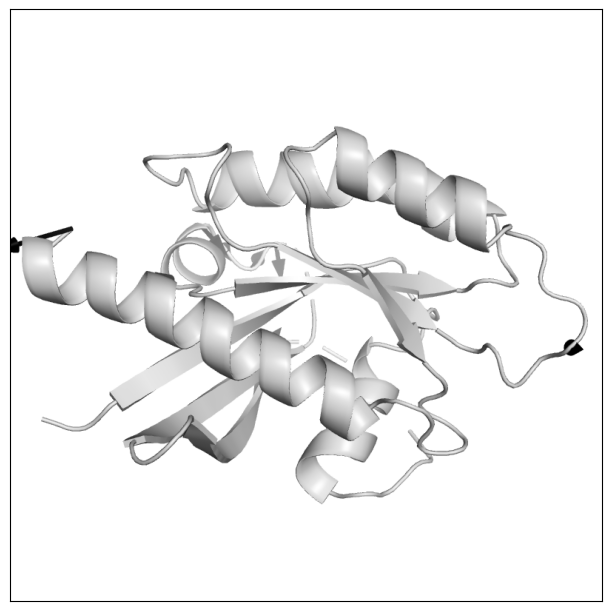

cheY
PyMOL>show_disp 19

Total number of atoms = 128
Atoms skipped = 0
Atoms counted = 2 (see PyMOL object "modevectors")
Atoms cutoff  = 126


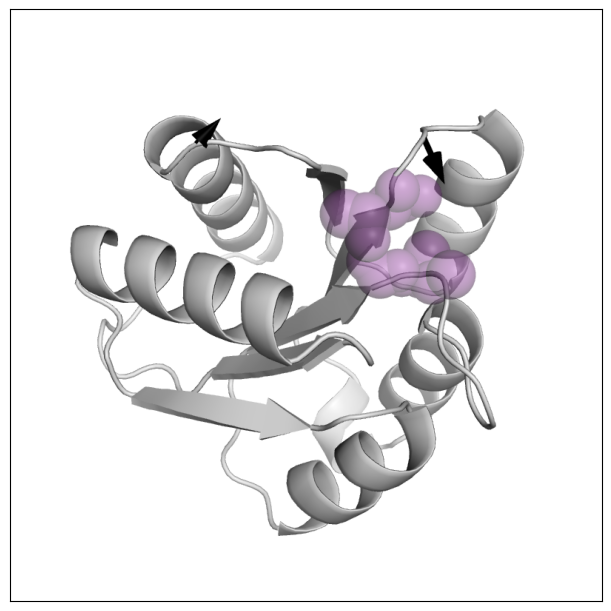

dctD
PyMOL>show_disp 20

Total number of atoms = 143
Atoms skipped = 0
Atoms counted = 27 (see PyMOL object "modevectors")
Atoms cutoff  = 116


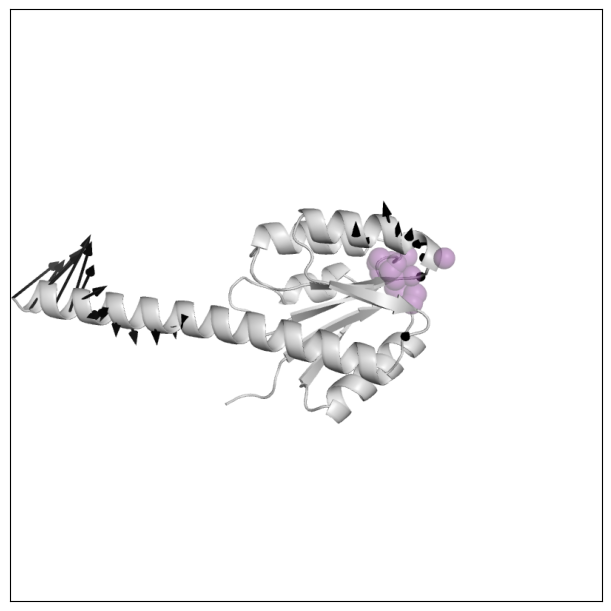

ME2
PyMOL>show_disp 46

Total number of atoms = 2204
Atoms skipped = 0
Atoms counted = 1353 (see PyMOL object "modevectors")
Atoms cutoff  = 851


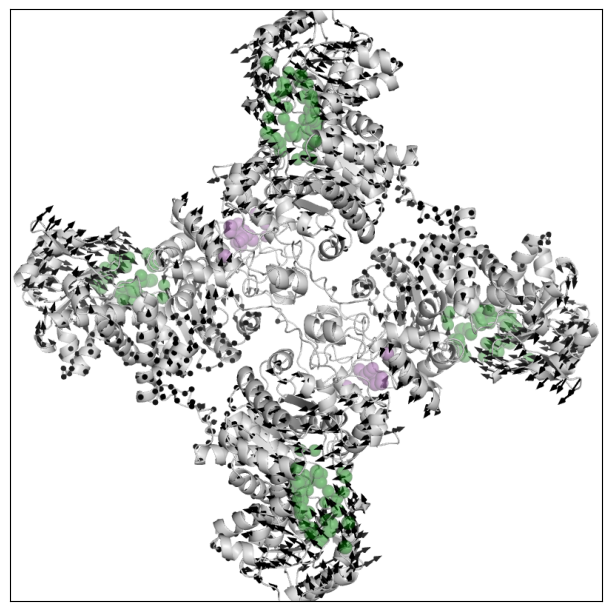

groEL
PyMOL>show_disp 54

Total number of atoms = 3288
Atoms skipped = 0
Atoms counted = 2841 (see PyMOL object "modevectors")
Atoms cutoff  = 447


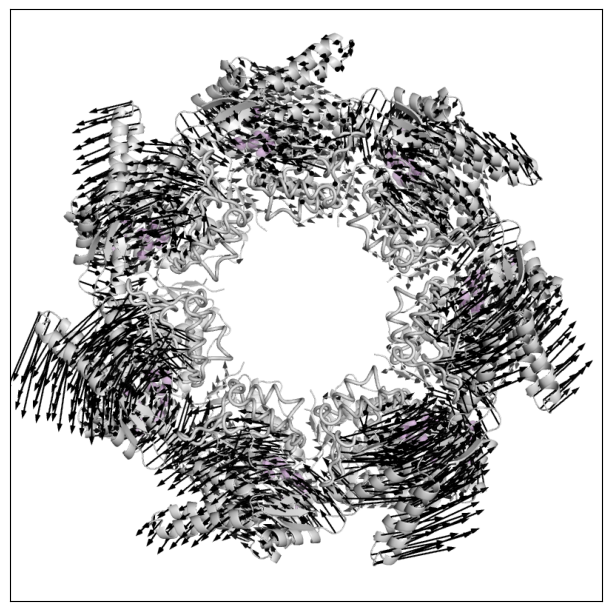

In [4]:
# selection = np.arange(51)

for index, row in df_db.iterrows():
    if index not in selection:
        continue
        
    if row['skip'] == 'yes':
        continue

#     if index not in selection:
#         continue
        
    print(row['protein_id'])

    cmd.reinitialize()
    cmd.run("src/pymol_cmds.py")
    cmd.do("show_disp {}".format(index))
    cmd.ray(800, 800)
    cmd.png("data/figs/test_disp.png")

    
    fig, ax1 = plt.subplots(1, 1, constrained_layout=True, figsize=(6, 6))
    
    ax1.imshow(mpimg.imread('data/figs/test_disp.png'))
    
    ax1.get_xaxis().set_ticks([])
    ax1.get_yaxis().set_ticks([])
    
    plt.show()
    

In [5]:
import time

if os.path.exists("data/results.xlsx"):
    df_results =  pd.read_excel('data/results.xlsx')

else:
    df_results = pd.DataFrame(columns=["protein_id", "subunit_structure", "lrmsd_norm", 
                                       "hinge_scale", "overlap", "sector_sizes", 
                                       "multi_hinge_scale", "multi_overlap", "multi_sector_sizes",
                                      "allo_path_scale", "allo_path_norm", 
                                       "coop_path_scale", "coop_path_norm"])

df_results.set_index("protein_id", inplace=True)

df_results['sector_sizes'] = df_results['sector_sizes'].astype('object')
df_results['multi_sector_sizes'] = df_results['multi_sector_sizes'].astype('object')

display(df_results)
    
l0 = 15
min_size = 200
    
for index, row in df_db.iterrows():
    
    if row['skip'] == 'yes':
        continue

    if index not in selection:
        continue
    
    
    N_sectors = df_db.loc[index, 'n_sectors']
    
    
#     if N_sectors == 2:
#         continue
    
    prot_id = row['protein_id']
    
    print("######################################################")
        
    print(index, prot_id)
    
#     df_results.drop(index=prot_id, inplace=True, errors='ignore')
    
    df_results.loc[prot_id, 'subunit_structure'] = row['subunit_structure']
    
    with open("data/" + prot_id + "/structure.pkl", 'rb') as pkl_file:
        data = pickle.load(pkl_file)
        df_prot_merged = data['merged structure']
        df_bonds_ref_merged = data['merged reference bonds']
        
        df_prot_ref = data['reference structure']
        df_bonds_ref = data['reference bonds']
        
    print("Protein Size:", len(df_prot_merged.index), flush=True)
    
    # calculate local deformation
    palgs.calc_local_rmsd(df_prot_merged, l0=l0)
      
            
        
    has_allo_path = False
    has_coop_path = False
    # find allosteric pathways
    if len(df_prot_merged.query("allo_site!=-1 and active_site==-1")) > 0 and len(df_prot_merged.query("allo_site==-1 and active_site!=-1")) > 0:
        has_allo_path = True
    
        allo_strain_path_scales, allo_strain_path_lengths, allo_strain_paths, max_edge_scale = palgs.find_allo_strain_path(df_prot_merged, df_bonds_ref_merged)
        allo_strain_path_scale = allo_strain_path_scales[0]
        allo_strain_path = allo_strain_paths[0]
                
        print("Allo Path Scale:", allo_strain_path_scale)
        
        df_results.loc[prot_id, 'allo_path_scale'] = allo_strain_path_scale
           
        allo_path_norm = df_prot_merged.iloc[allo_strain_path[0]]['lrmsd']
        
        df_results.loc[prot_id, 'allo_path_norm'] = allo_path_norm
        
        print("Allo Path Norm:", allo_path_norm)
            
        df_prot_merged['allo_path'] = -1
        for i, vi in enumerate(allo_strain_path):
            df_prot_merged.iloc[vi, df_prot_merged.columns.get_loc("allo_path")] = i
            
        df_bonds_ref_merged['allo_path_max_scale'] = max_edge_scale
            

    # find cooperative pathways
    if len(df_prot_merged.query("allo_site==-1 and active_site!=-1")['active_site'].unique()) > 1:
        has_coop_path = True
        
        coop_strain_path_scales, coop_strain_path_lengths, coop_strain_paths, max_edge_scale = palgs.find_coop_strain_path(df_prot_merged, df_bonds_ref_merged)
        coop_strain_path_scale = coop_strain_path_scales[0]
        coop_strain_path = coop_strain_paths[0]
        
        print("Coop Path Scale:", coop_strain_path_scale)
    
        df_results.loc[prot_id, 'coop_path_scale'] = coop_strain_path_scale
        
        coop_path_norm = np.max([df_prot_merged.iloc[coop_strain_path[0]]['lrmsd'], df_prot_merged.iloc[coop_strain_path[-1]]['lrmsd']])
        
        df_results.loc[prot_id, 'coop_path_norm'] = coop_path_norm
        
        print("Coop Path Norm:", coop_path_norm)
            
        
        df_prot_merged['coop_path'] = -1
        for i, vi in enumerate(coop_strain_path):
            df_prot_merged.iloc[vi, df_prot_merged.columns.get_loc("coop_path")] = i
            
        df_bonds_ref_merged['coop_path_max_scale'] = max_edge_scale
    
    if len(df_prot_merged.query("allo_site!=-1")) > 0:
        S_max = df_prot_merged.query("allo_site!=-1")['lrmsd'].max()
        print("S_max:", S_max)
        df_results.loc[prot_id, 'S_max'] = S_max

        S_avg = df_prot_merged.query("allo_site!=-1")['lrmsd'].mean()
        print("S_avg:", S_avg)
        df_results.loc[prot_id, 'S_avg'] = S_avg
        
    if len(df_prot_merged.query("active_site!=-1")) > 0:
        T_max = df_prot_merged.query("active_site!=-1")['lrmsd'].max()
        print("T_max:", T_max)
        df_results.loc[prot_id, 'T_max'] = T_max
        
        T_avg = df_prot_merged.query("active_site!=-1")['lrmsd'].mean()
        print("T_avg:", T_avg)
        df_results.loc[prot_id, 'T_avg'] = T_avg
        

    if has_allo_path:
        print("Using allosteric pathway normalization.")
        df_results.loc[prot_id, 'lrmsd_norm'] = df_results.loc[prot_id, 'allo_path_norm']
    elif has_coop_path:
        print("Using cooperative pathway normalization.")
        df_results.loc[prot_id, 'lrmsd_norm'] = df_results.loc[prot_id, 'coop_path_norm'] 
    # only has allosteric sites labeled
    elif len(df_prot_merged.query("allo_site!=-1")) > 0:
        print("Using allosteric site normalization.")
        df_results.loc[prot_id, 'lrmsd_norm'] = df_results.loc[prot_id, 'S_avg']
    # only has active sites labeled
    elif len(df_prot_merged.query("active_site!=-1")) > 0:
        print("Using active site normalization.")
        df_results.loc[prot_id, 'lrmsd_norm'] = df_results.loc[prot_id, 'T_avg']
    else:
        print("Error finding normalization...")
        
    print("Normalization:", df_results.loc[prot_id, 'lrmsd_norm'])
    

    
    print("Min Sector Size:", min_size)
     
    start = time.time()
        
    hinge_scale, hinge_overlap, sectors_to_verts = palgs.find_hinge(df_prot_merged, df_bonds_ref_merged, N_sectors=2, min_size=min_size)
    
    print("Hinge Scale:", hinge_scale)
    print("Overlap:", hinge_overlap)
    end = time.time()
        
    sector_sizes = [len(sectors_to_verts[si]) for si in range(len(sectors_to_verts))]
    
        
    df_results.loc[prot_id, 'hinge_scale'] = hinge_scale
    df_results.loc[prot_id, 'overlap'] = hinge_overlap
    df_results.at[prot_id, 'sector_sizes'] = sector_sizes
    
    df_prot_merged['sector'] = -1
    for si in range(len(sectors_to_verts)):
        df_prot_merged.iloc[list(sectors_to_verts[si]), df_prot_merged.columns.get_loc("sector")] = si
    
        
    if N_sectors > 2:
        
        multi_hinge_scale, multi_hinge_overlap, sectors_to_verts = palgs.find_hinge(df_prot_merged, df_bonds_ref_merged, N_sectors=N_sectors, min_size=min_size)

        sector_sizes = [len(sectors_to_verts[si]) for si in range(len(sectors_to_verts))]
        
        print("Multi Hinge Scale:", multi_hinge_scale)
        print("Multi Overlap:", multi_hinge_overlap)

        df_results.loc[prot_id, 'multi_hinge_scale'] = multi_hinge_scale
        df_results.loc[prot_id, 'multi_overlap'] = multi_hinge_overlap
        df_results.at[prot_id, 'multi_sector_sizes'] = sector_sizes
        
        df_prot_merged['multi_sector'] = -1
        for si in range(len(sectors_to_verts)):
            df_prot_merged.iloc[list(sectors_to_verts[si]), df_prot_merged.columns.get_loc("multi_sector")] = si

    print("Elapsed Time:", (end - start)/60, "min")

   
    
    with open("data/" + prot_id + "/structure.pkl", 'wb') as pkl_file:
        data['merged structure'] = df_prot_merged
        data['merged reference bonds'] = df_bonds_ref_merged
        pickle.dump(data, pkl_file)
        
    print("######################################################")
        
    print("Normalized Hinge Scale:", hinge_scale/df_results.loc[prot_id, 'lrmsd_norm'])
    print("Hinge Overlap:", hinge_overlap)
    
    if N_sectors > 2:
        print("Normalized Multidomain Hinge Scale:", multi_hinge_scale/df_results.loc[prot_id, 'lrmsd_norm'])
        print("Multidomain Hinge Overlap:", multi_hinge_overlap)
    
    if has_allo_path:
        print("Normalized Allo Pathway Scale:", allo_strain_path_scale/df_results.loc[prot_id, 'lrmsd_norm'])
    if has_coop_path:
        print("Normalized Coop Pathway Scale:", coop_strain_path_scale/df_results.loc[prot_id, 'lrmsd_norm'])
        
    print("######################################################")
        
    display(df_results.loc[prot_id])
        
    df_results.to_excel("data/results.xlsx") 
            
display(df_results)
    

,subunit_structure,lrmsd_norm,hinge_scale,overlap,sector_sizes,multi_hinge_scale,multi_overlap,multi_sector_sizes,allo_path_scale,allo_path_norm,coop_path_scale,coop_path_norm,S_max,S_avg,T_max,T_avg
protein_id,,,,,,,,,,,,,,,,
ARF6,monomer,5.449361,0.114520,0.352951,"[308, 1013]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.421571,5.449361,NaN,NaN
CDC42,monomer,7.417029,0.168181,0.174635,"[212, 1254]",NaN,NaN,NaN,5.496503,7.417029,NaN,NaN,9.783471,3.662031,8.837249,2.885582
tuf,monomer,4.870424,4.027254,0.932934,"[1632, 1444]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.663003,4.870424,NaN,NaN
RAB11A,monomer,1.885349,0.117590,0.373637,"[470, 840]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.717917,1.885349,NaN,NaN
RAC1,monomer,2.419059,0.081578,0.253335,"[1167, 200]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.692600,2.419059,NaN,NaN
RAP2A,monomer,3.064572,0.343879,0.130885,"[236, 979]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.081576,3.064572,NaN,NaN
HRAS,monomer,2.277317,0.168723,0.155919,"[207, 1133]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.078641,2.277317,NaN,NaN
RHEB,monomer,2.290213,0.074034,0.127771,"[206, 1138]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.271561,2.290213,NaN,NaN
RHOA,monomer,2.830846,0.133620,0.206964,"[375, 1028]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.789191,2.830846,NaN,NaN


######################################################
4 Rab7a
Protein Size: 1314
Error finding normalization...
Normalization: nan
Min Sector Size: 200
[1314]
0 / 75
Hinge Scale: 0.0024446421434837773 Overlap: 0.11360732887919432
Sector Sizes: [385, 929]
5 / 75
Hinge Scale: 0.004771813621059939 Overlap: 0.13372503103992045
Sector Sizes: [255, 1059]
Hinge Scale: 0.004771813621059939 Overlap: 0.13372503103992045
Sector Sizes: [255, 1059]
Hinge Scale: 0.004771813621059939
Overlap: 0.13372503103992045
Elapsed Time: 0.12021279732386271 min
######################################################
Normalized Hinge Scale: nan
Hinge Overlap: 0.13372503103992045
######################################################


subunit_structure         monomer
lrmsd_norm                    NaN
hinge_scale              0.004772
overlap                  0.133725
sector_sizes          [255, 1059]
multi_hinge_scale             NaN
multi_overlap                 NaN
multi_sector_sizes            NaN
allo_path_scale               NaN
allo_path_norm                NaN
coop_path_scale               NaN
coop_path_norm                NaN
S_max                         NaN
S_avg                         NaN
T_max                         NaN
T_avg                         NaN
Name: Rab7a, dtype: object

######################################################
19 cheY
Protein Size: 979
S_max: 2.730858552969637
S_avg: 2.034404335123263
Using allosteric site normalization.
Normalization: 2.034404335123263
Min Sector Size: 200
[979]
0 / 54
Hinge Scale: 0.014921641905845662 Overlap: 0.13374330804741774
Sector Sizes: [347, 632]
2 / 54
Hinge Scale: 0.02480252468101346 Overlap: 0.13346648082816523
Sector Sizes: [335, 644]
8 / 54
Hinge Scale: 0.05392175218452788 Overlap: 0.25282518213745064
Sector Sizes: [744, 235]
11 / 54
Hinge Scale: 0.08324925145851003 Overlap: 0.2685460150023701
Sector Sizes: [697, 282]
Hinge Scale: 0.08324925145851003 Overlap: 0.2685460150023701
Sector Sizes: [697, 282]
Hinge Scale: 0.08324925145851003
Overlap: 0.2685460150023701
Elapsed Time: 0.000342714786529541 min
######################################################
Normalized Hinge Scale: 0.040920700974354754
Hinge Overlap: 0.2685460150023701
######################################################


subunit_structure        monomer
lrmsd_norm              2.034404
hinge_scale             0.083249
overlap                 0.268546
sector_sizes          [697, 282]
multi_hinge_scale            NaN
multi_overlap                NaN
multi_sector_sizes           NaN
allo_path_scale              NaN
allo_path_norm               NaN
coop_path_scale              NaN
coop_path_norm               NaN
S_max                   2.730859
S_avg                   2.034404
T_max                        NaN
T_avg                        NaN
Name: cheY, dtype: object

######################################################
20 dctD
Protein Size: 1070
S_max: 8.642964399945495
S_avg: 3.13578752819287
Using allosteric site normalization.
Normalization: 3.13578752819287
Min Sector Size: 200
[1070]
0 / 61
Hinge Scale: 0.059450784389661726 Overlap: 0.23694977219680444
Sector Sizes: [486, 584]
Hinge Scale: 0.059450784389661726 Overlap: 0.23694977219680444
Sector Sizes: [486, 584]
Hinge Scale: 0.059450784389661726
Overlap: 0.23694977219680444
Elapsed Time: 0.0004008134206136068 min
######################################################
Normalized Hinge Scale: 0.01895880503865731
Hinge Overlap: 0.23694977219680444
######################################################


subunit_structure        monomer
lrmsd_norm              3.135788
hinge_scale             0.059451
overlap                  0.23695
sector_sizes          [486, 584]
multi_hinge_scale            NaN
multi_overlap                NaN
multi_sector_sizes           NaN
allo_path_scale              NaN
allo_path_norm               NaN
coop_path_scale              NaN
coop_path_norm               NaN
S_max                   8.642964
S_avg                   3.135788
T_max                        NaN
T_avg                        NaN
Name: dctD, dtype: object

######################################################
46 ME2
Protein Size: 17368
Allo Path Scale: 1.632276294790293
Allo Path Norm: 1.9262550010413462
Coop Path Scale: 3.8736461385022247
Coop Path Norm: 4.2092496819945
S_max: 4.20667876052297
S_avg: 1.981978064234608
T_max: 5.123064759562298
T_avg: 2.110647000329798
Using allosteric pathway normalization.
Normalization: 1.9262550010413462
Min Sector Size: 200
[17368]
1 / 980
Hinge Scale: 0.004124662036215199 Overlap: 0.12864577345471906
Sector Sizes: [17043, 325]
5 / 980
Hinge Scale: 0.04620521638205799 Overlap: 0.12843647215486328
Sector Sizes: [465, 16903]
7 / 980
Hinge Scale: 0.05939052018704194 Overlap: 0.15372349628110338
Sector Sizes: [417, 16951]
15 / 980
Hinge Scale: 0.0888706343758574 Overlap: 0.09240185972466763
Sector Sizes: [225, 17143]
16 / 980
Hinge Scale: 0.0965880445117136 Overlap: 0.36882458583327754
Sector Sizes: [15245, 2123]
17 / 980
Hinge Scale: 0.09681511922345448 Overlap: 0.350451903996285
Sector Sizes: [2203, 1

subunit_structure                 homotetramer
lrmsd_norm                            1.926255
hinge_scale                           0.524412
overlap                               0.410279
sector_sizes                      [8696, 8672]
multi_hinge_scale                     0.353085
multi_overlap                         0.746774
multi_sector_sizes    [4291, 4325, 4371, 4381]
allo_path_scale                       1.632276
allo_path_norm                        1.926255
coop_path_scale                       3.873646
coop_path_norm                         4.20925
S_max                                 4.206679
S_avg                                 1.981978
T_max                                 5.123065
T_avg                                 2.110647
Name: ME2, dtype: object

######################################################
54 groEL
Protein Size: 23581
S_max: 8.049324927931625
S_avg: 1.9990403215393404
Using allosteric site normalization.
Normalization: 1.9990403215393404
Min Sector Size: 200
[23581]
0 / 1497
Hinge Scale: 0.020563022593258595 Overlap: 0.24790632261830042
Sector Sizes: [16074, 7507]
1 / 1497
Hinge Scale: 0.029786768561706145 Overlap: 0.1336597576485306
Sector Sizes: [11017, 12564]
4 / 1497
Hinge Scale: 0.04938685503062146 Overlap: 0.12972768613380392
Sector Sizes: [7832, 15749]
7 / 1497
Hinge Scale: 0.05803997939527483 Overlap: 0.28175609021032294
Sector Sizes: [4596, 18985]
8 / 1497
Hinge Scale: 0.05833156421591379 Overlap: 0.17944894348355295
Sector Sizes: [6378, 17203]
9 / 1497
Hinge Scale: 0.06110905848117287 Overlap: 0.2672587434795011
Sector Sizes: [12859, 10722]
11 / 1497
Hinge Scale: 0.07089673624810322 Overlap: 0.17861386368226978
Sector Sizes: [6418, 17163]
12 / 1497
Hinge Scale: 0.0731425980110536 Overlap: 0.2454760977733733

subunit_structure                  monoseptamer
lrmsd_norm                              1.99904
hinge_scale                            0.577258
overlap                                0.310564
sector_sizes                      [22023, 1558]
multi_hinge_scale                      0.439666
multi_overlap                          0.603518
multi_sector_sizes    [13684, 6733, 1606, 1558]
allo_path_scale                             NaN
allo_path_norm                              NaN
coop_path_scale                             NaN
coop_path_norm                              NaN
S_max                                  8.049325
S_avg                                   1.99904
T_max                                       NaN
T_avg                                       NaN
Name: groEL, dtype: object

,subunit_structure,lrmsd_norm,hinge_scale,overlap,sector_sizes,multi_hinge_scale,multi_overlap,multi_sector_sizes,allo_path_scale,allo_path_norm,coop_path_scale,coop_path_norm,S_max,S_avg,T_max,T_avg
protein_id,,,,,,,,,,,,,,,,
ARF6,monomer,5.449361,0.114520,0.352951,"[308, 1013]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.421571,5.449361,NaN,NaN
CDC42,monomer,7.417029,0.168181,0.174635,"[212, 1254]",NaN,NaN,NaN,5.496503,7.417029,NaN,NaN,9.783471,3.662031,8.837249,2.885582
tuf,monomer,4.870424,4.027254,0.932934,"[1632, 1444]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.663003,4.870424,NaN,NaN
RAB11A,monomer,1.885349,0.117590,0.373637,"[470, 840]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.717917,1.885349,NaN,NaN
RAC1,monomer,2.419059,0.081578,0.253335,"[1167, 200]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.692600,2.419059,NaN,NaN
RAP2A,monomer,3.064572,0.343879,0.130885,"[236, 979]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.081576,3.064572,NaN,NaN
HRAS,monomer,2.277317,0.168723,0.155919,"[207, 1133]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.078641,2.277317,NaN,NaN
RHEB,monomer,2.290213,0.074034,0.127771,"[206, 1138]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.271561,2.290213,NaN,NaN
RHOA,monomer,2.830846,0.133620,0.206964,"[375, 1028]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.789191,2.830846,NaN,NaN


4 Rab7a
PyMOL>show_disp 4

Total number of atoms = 164
Atoms skipped = 0
Atoms counted = 8 (see PyMOL object "modevectors")
Atoms cutoff  = 156
PyMOL>show_topo 4


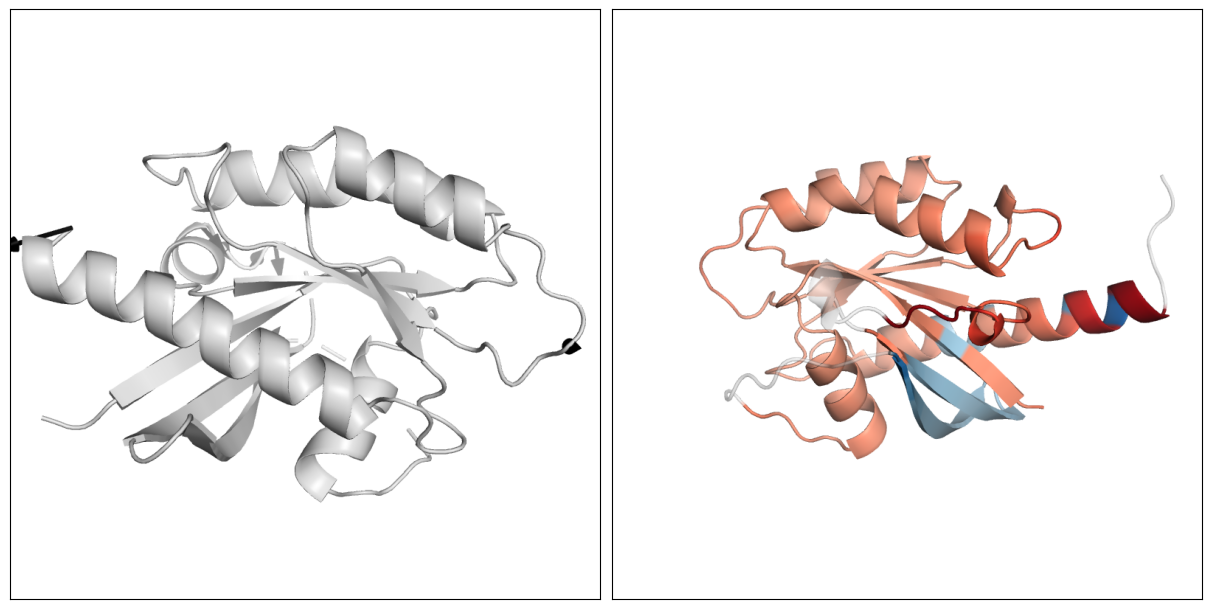

19 cheY
PyMOL>show_disp 19

Total number of atoms = 128
Atoms skipped = 0
Atoms counted = 2 (see PyMOL object "modevectors")
Atoms cutoff  = 126
PyMOL>show_topo 19


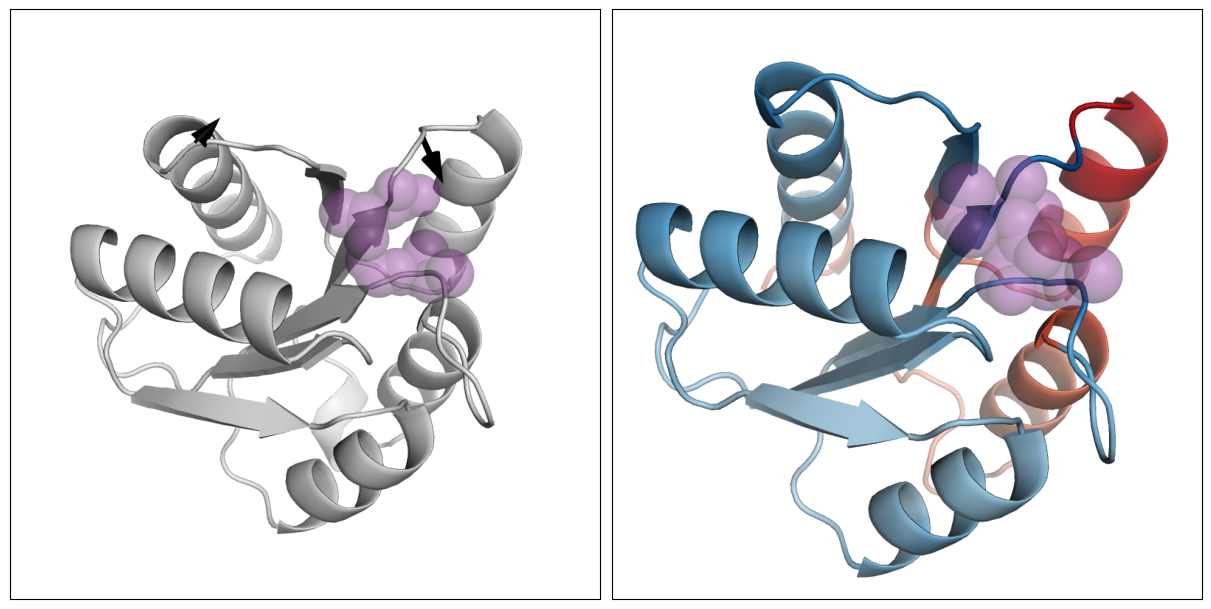

20 dctD
PyMOL>show_disp 20

Total number of atoms = 143
Atoms skipped = 0
Atoms counted = 27 (see PyMOL object "modevectors")
Atoms cutoff  = 116
PyMOL>show_topo 20


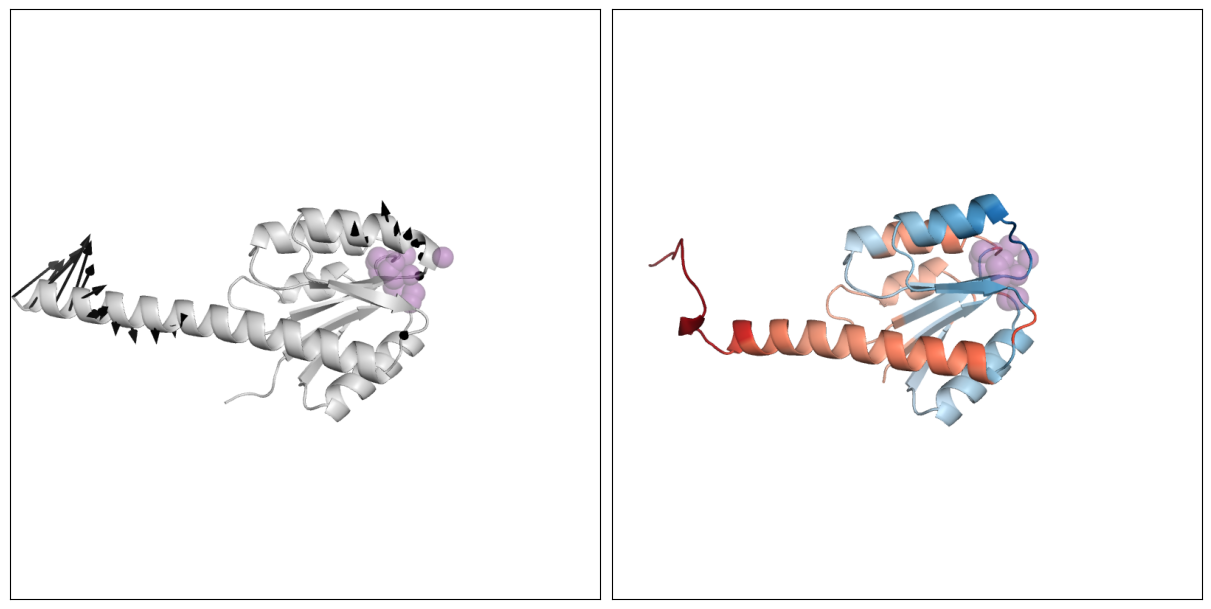

46 ME2
PyMOL>show_disp 46

Total number of atoms = 2204
Atoms skipped = 0
Atoms counted = 1353 (see PyMOL object "modevectors")
Atoms cutoff  = 851
PyMOL>show_topo 46


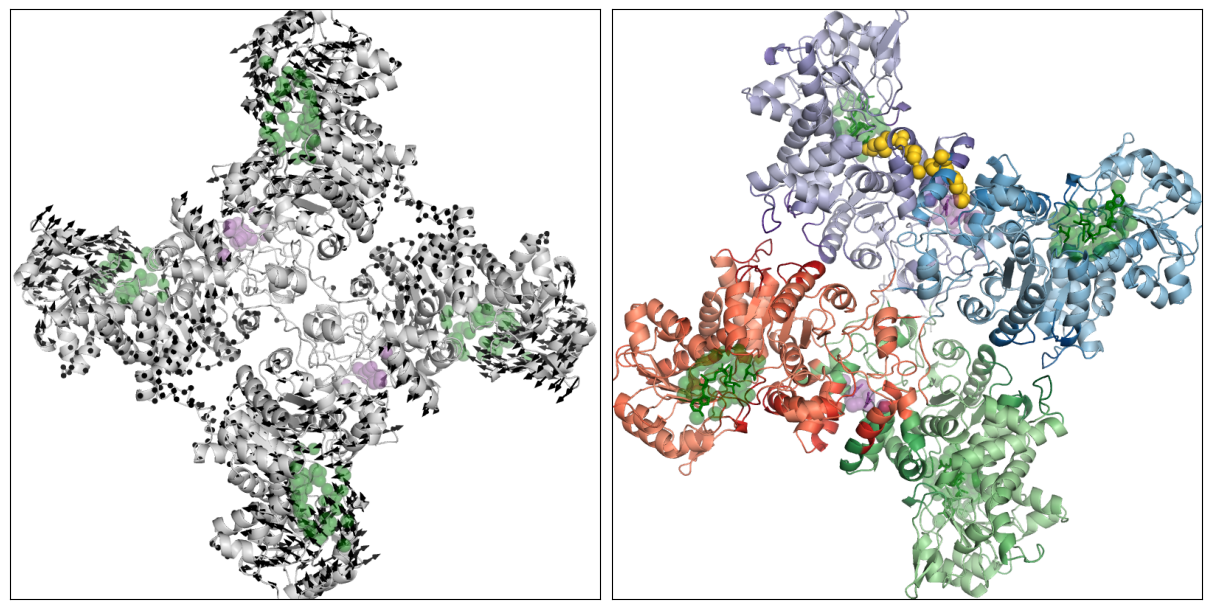

54 groEL
PyMOL>show_disp 54

Total number of atoms = 3288
Atoms skipped = 0
Atoms counted = 2841 (see PyMOL object "modevectors")
Atoms cutoff  = 447
PyMOL>show_topo 54


In [ ]:
# selection = [53]

for index, row in df_db.iterrows():
        
    if row['skip'] == 'yes':
        continue

    if index not in selection:
        continue
        
    print(index, row['protein_id'])
    
#     print(df_results.loc[row['protein_id']])

    cmd.reinitialize()
    cmd.run("src/pymol_cmds.py")
    cmd.do("show_disp {}".format(index))
    cmd.ray(800, 800)
    cmd.png('data/figs/{}_disp.png'.format(row['protein_id']))

    cmd.reinitialize()
    cmd.run("src/pymol_cmds.py")
    cmd.do("show_topo {}".format(index))
    cmd.ray(800, 800)
    cmd.png('data/figs/{}_topo.png'.format(row['protein_id']))
    
    # cmd.reinitialize()
    # cmd.run("src/pymol_cmds.py")
    # cmd.do("show_paths {}".format(index))
    # cmd.ray(800, 800)
    # cmd.png('data/figs/{}_topo.png'.format(row['protein_id']))
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 6))
    
    ax1.imshow(mpimg.imread('data/figs/{}_disp.png'.format(row['protein_id'])))
    
    ax1.get_xaxis().set_ticks([])
    ax1.get_yaxis().set_ticks([])
    
    ax2.imshow(mpimg.imread('data/figs/{}_topo.png'.format(row['protein_id'])))
    
    ax2.get_xaxis().set_ticks([])
    ax2.get_yaxis().set_ticks([])
    
    plt.show()
    
    

